In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression

In [278]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

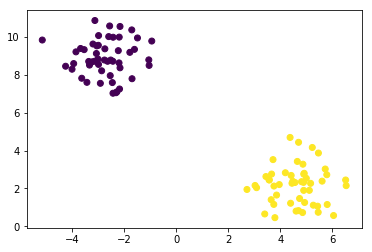

In [279]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [280]:
# model = LogisticRegression(verbose=1) # verbose gives more log
model = LogisticRegression()

In [281]:
model.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [282]:
np.unique(y)

array([0, 1])

In [283]:
model.classes_ # gives unique classes in y, same as np.unique(y)
model.coef_

array([[ 1.37564164, -0.34951798]])

In [284]:
model.intercept_

array([0.18389195])

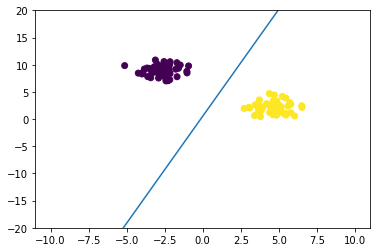

In [285]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.ylim(-20, 20)
x1_sample = np.linspace(-10, 10, 2)

for coef, intercept in zip(model.coef_, model.intercept_):
    
    x2_sample = -coef[0]/coef[1] * x1_sample - intercept/coef[1]
    plt.plot(x1_sample, x2_sample)

In [286]:
colors = ["red", "green", "blue", "yellow", "orange"]

In [287]:
y_colors = list(map(lambda c: colors[c], y))

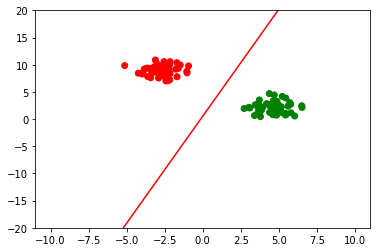

In [288]:
plt.scatter(X[:, 0], X[:, 1], c=y_colors)
plt.ylim(-20, 20)
x1_sample = np.linspace(-10, 10, 2)

for i, (coef, intercept) in enumerate(zip(model.coef_, model.intercept_)):
    
    x2_sample = -coef[0]/coef[1] * x1_sample - intercept/coef[1]
    plt.plot(x1_sample, x2_sample, color=colors[i])

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
X_train, X_test, y_train, y_test = train_test_split(
...  X, y, test_size=0.33, random_state=42)

In [291]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [292]:
model.score(X_test, y_test)

1.0

In [365]:
class LogisticRegressionCustom:
    
    def __init__(self, lr=.1):
        self.lr = lr
        
    def fit(self, X, y):
        self.__X = X.astype(np.float128)
        self.__y = y.reshape(-1, 1).astype(np.float128)
        
        self.n_features = X.shape[1]
        
        self.coef_ = np.random.randn(self.n_features).astype(np.float128) * 10
        self.intercept_ = np.random.random()
        
        for i in range(10000):
            self.gradient_decend()
            
        
    def gradient_decend(self):
        
        d_coef, d_intercept = self.gradient()
        
        self.coef_ += d_coef * self.lr
        self.intercept_ += d_intercept * self.lr
        
    def gradient(self):
        
        yh = self.predict(self.__X)
        # from derivation
        d_coef = np.dot((yh-self.__y).T, self.__X).flatten() / self.__X.shape[0]
        d_intercept = (yh-self.__y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        yh = self.hypothesis(X)
        return (yh < .5).astype(int)

    def hypothesis(self, X):
        g = (np.sum(X * self.coef_, axis=1, keepdims=True) + self.intercept_ ) /100
        y = 1 / (1 + np.exp(-g))
        return y
    
    def score(self, X, y):
        yp = self.predict(X).flatten()
        return (y==yp).mean()
        
        
        
        

In [366]:
# a = np.linspace(-100, 100, 10000)

# b = 1 / (1 + np.exp(-a))

# plt.plot(a, b)

model = LogisticRegressionCustom(lr=1)

In [367]:
model.fit(X_train, y_train)

model.coef_

model.intercept_

1.8640122913610772985

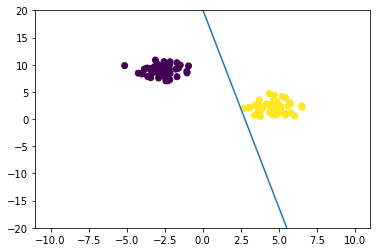

In [368]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.ylim(-20, 20)
x1_sample = np.linspace(-10, 10, 2)

x2_sample = -model.coef_[0]/model.coef_[1] * x1_sample - model.intercept_/model.coef_[1]
plt.plot(x1_sample, x2_sample)

In [369]:
model.predict(X_test[:10])

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [370]:
y_test[:10]

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [371]:
model.score(X_test, y_test)

1.0